<a href="https://colab.research.google.com/github/bmnds/uea-data-science-04-data-processing/blob/main/trabalho-final/Notebook_Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final

## Definição do trabalho
**Grupo:** Alberto Lins, Bruno Mendes, Lelson Nascimento e Levi Bessa

**Disciplina:** Aquisição, Pré-processamento e Exploração de dados
### O Trabalho
* I - Definir um tema e os objetivos a serem analisados 
   2. Enumerar algumas questões interessantes para o negócio
* II - Realizar um processo de ETL e de análise dos dados
   3. Coletar dados que vão permitir responder as questões de negócio
   4. Aplicar métodos de pré-processamento e justificar o uso de cada um deles
   5. Explorar os dados para responder as questões de negócio

**Tema escolhido:** Resultado das eleições municipais de Manaus de 2020 e temas relacionados


## I - Questões a serem respondidas

* LEVI - (Prefeito) Qual a inferência no quantitativo de abstenção por bairro ?
* LEVI - (Prefeito) Quais relações entre seções e bairros  na votação de cada candidato ?
* LELSON - Qual a relação entre as votações de candidatos/partidos e a renda média das pesssoa nos bairros ?
* LELSON - Qual a relação entre o candidato escolhido e a renda da população a nível de bairro?
* LELSON - Qual a relação entre o partido escolhido (vereadores e prefeitos) e a média salarial da população a nível de bairro?
* LELSON - Qual a relação entre o partido do vereador e o partido do prefeito escolhido por zona municipal?
* ALBERTO - Qual o atributo mais relevante na escolha do candidato? (renda, densidade populacional, grau de escolaridade, faixa etária)
* ALBERTO - Quais os bairros com menor índice de abstenção ou brancos e nulos?

### Pré-Processamento
* BRUNO - Normalizar e discretizar renda e densidade populacional
* BRUNO - Calcular o grau de escolaridade e a faixa etária predominante da população por bairro


## Baixar os dados do Repositório do Google Drive

In [ ]:
!curl -o eleicoes2020.tar.gz -s -OL 'https://drive.google.com/uc?export=download&id=1-1v_7xBem5VdYwFFaaNl2EKPLYaDadPa'
!tar -zxvf eleicoes2020.tar.gz
!rm eleicoes2020.tar.gz

datasets/eleicoes.csv
datasets/leiame-boletim_urna.pdf
datasets/prefeitos_2t.csv
datasets/prefeitos.csv
datasets/resultados_prefeito_2t.csv
datasets/resultados_prefeito.csv
datasets/resultados_vereador.csv
datasets/secoes.csv
datasets/vereadores.csv


#### Importar os dados

In [ ]:
import pandas as pd
import numpy as np

#### Ler os Candidatos à Prefeito de Manaus e salva-los na variável "df_p"

In [ ]:
df_p = pd.read_csv('data/prefeitos.csv')
df_p.sample(10)

,eleicao,uf,municipio,cargo,numero,partido,candidato
3,426,AM,MANAUS,Prefeito,19,PODE,AMAZONINO MENDES
8,426,AM,MANAUS,Prefeito,55,PSD,RICARDO NICOLAU
2,426,AM,MANAUS,Prefeito,16,PSTU,GILBERTO VASCONCELOS
7,426,AM,MANAUS,Prefeito,51,PATRIOTA,CORONEL MENEZES
6,426,AM,MANAUS,Prefeito,30,NOVO,ROMERO REIS
5,426,AM,MANAUS,Prefeito,27,DC,CHICO PRETO
10,426,AM,MANAUS,Prefeito,70,AVANTE,DAVID ALMEIDA
9,426,AM,MANAUS,Prefeito,65,PC do B,MARCELO AMIL
4,426,AM,MANAUS,Prefeito,22,PL,ALFREDO NASCIMENTO
0,426,AM,MANAUS,Prefeito,10,REPUBLICANOS,CAPITÃO ALBERTO NETO


In [ ]:
df_p2t = pd.read_csv('data/prefeitos_2t.csv')
df_p2t.head()

,eleicao,uf,municipio,cargo,numero,partido,candidato
0,427,AM,MANAUS,Prefeito,19,PODE,AMAZONINO MENDES
1,427,AM,MANAUS,Prefeito,70,AVANTE,DAVID ALMEIDA


In [ ]:
df_rp = pd.read_csv('data/resultados_prefeito.csv')
df_rp.sample(10)

,eleicao,uf,municipio,zona,secao,cargo,numero,tipo,votos
8736,426,AM,MANAUS,32,705,Prefeito,51,Válido,31
10514,426,AM,MANAUS,32,864,Prefeito,22,Válido,3
24516,426,AM,MANAUS,62,393,Prefeito,22,Válido,5
3223,426,AM,MANAUS,2,571,Prefeito,30,Válido,27
4677,426,AM,MANAUS,2,707,Prefeito,16,Válido,2
2660,426,AM,MANAUS,1,901,Prefeito,96,Nulo,17
8558,426,AM,MANAUS,32,690,Prefeito,22,Válido,15
9776,426,AM,MANAUS,32,796,Prefeito,10,Válido,24
35627,426,AM,MANAUS,68,647,Prefeito,51,Válido,18
30176,426,AM,MANAUS,63,746,Prefeito,27,Anulado sub judice,6


In [ ]:
df_rp2 = pd.read_csv('data/resultados_prefeito_2t.csv')
df_rp2.sample(10)

,eleicao,uf,municipio,zona,secao,cargo,numero,tipo,votos
10646,427,AM,MANAUS,65,393,Prefeito,96,Nulo,22
5697,427,AM,MANAUS,40,553,Prefeito,95,Branco,10
4439,427,AM,MANAUS,37,649,Prefeito,96,Nulo,23
685,427,AM,MANAUS,1,831,Prefeito,70,Válido,99
10457,427,AM,MANAUS,65,238,Prefeito,95,Branco,19
1197,427,AM,MANAUS,2,599,Prefeito,70,Válido,143
4790,427,AM,MANAUS,40,326,Prefeito,95,Branco,9
13287,427,AM,MANAUS,70,756,Prefeito,95,Branco,8
8379,427,AM,MANAUS,62,394,Prefeito,19,Válido,166
510,427,AM,MANAUS,1,778,Prefeito,95,Branco,18


In [ ]:
df_rv = pd.read_csv('data/resultados_vereador.csv')
df_rv.sample(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eleicao,uf,municipio,zona,secao,cargo,numero,tipo,votos
344402,426,AM,MANAUS,62,528,Vereador,65000,Válido,1
161147,426,AM,MANAUS,37,592,Vereador,22012,Válido,1
14376,426,AM,MANAUS,1,735,Vereador,13601,Válido,4
45196,426,AM,MANAUS,2,576,Vereador,19900,Válido,1
76087,426,AM,MANAUS,31,557,Vereador,20274,Válido,1
317225,426,AM,MANAUS,62,353,Vereador,90799,Válido,1
381441,426,AM,MANAUS,63,632,Vereador,70192,Válido,1
331737,426,AM,MANAUS,62,446,Vereador,25333,Válido,1
14907,426,AM,MANAUS,1,738,Vereador,51300,Válido,1
453356,426,AM,MANAUS,68,494,Vereador,14111,Válido,1


In [ ]:
df_v = pd.read_csv('data/vereadores.csv')
df_v.sample(10)

,eleicao,uf,municipio,cargo,numero,partido,candidato
51,426,AM,MANAUS,Vereador,20002,PSC,LAURA LYS
53,426,AM,MANAUS,Vereador,20010,PSC,MAURO MOTO TÁXI
70,426,AM,MANAUS,Vereador,23000,CIDADANIA,MARIVALDO
49,426,AM,MANAUS,Vereador,19999,PODE,KARINA QUEIROZ AM
92,426,AM,MANAUS,Vereador,28888,PRTB,CORONEL ROSSES
126,426,AM,MANAUS,Vereador,45145,PSDB,MARCELO RUBIM
157,426,AM,MANAUS,Vereador,70169,AVANTE,ENFERMEIRO SEBASTIAO CARLOS
107,426,AM,MANAUS,Vereador,40004,PSB,MARCO SAHDO
151,426,AM,MANAUS,Vereador,65123,PC do B,LUCIA ANTONY
90,426,AM,MANAUS,Vereador,28777,PRTB,GINA GARCIA


In [ ]:
df_z = pd.read_csv('data/zonas_eleitorais.csv')
df_z.sample(10)

,zona,processo,endereco,cep,bairro,municipio,uf
21,22,04-0022,"AVENIDA GETÚLIO VARGAS, S/N",69600000,CENTRO,SÃO PAULO DE OLIVENÇA,AM
28,31,04-0031,AV ANDRE ARAUJO SN ANEXO DO TRE 1 ANDAR,69060000,ALEIXO,MANAUS,AM
6,7,04-0007,"RUA 15 DE NOVEMBRO, S/N, CENTRO",69450000,CENTRO,CODAJÁS,AM
10,11,04-0011,"AV. PREFEITO JOAO CAVALCANTE, N. 1500",69880000,NOSSA SRA DE FATIMA,EIRUNEPÉ,AM
38,42,04-0042,"ESTRADA PEDRO TEIXEIRA, 1077",69650000,CENTRO,ATALAIA DO NORTE,AM
11,12,04-0012,"RUA DR. JOÃO FÁBIO DE ANDRADE, 1891",69830000,CENTRO,LÁBREA,AM
42,46,04-0046,RUA WALTER LINS S/N,69870000,RODOVIARIO,ENVIRA,AM
49,56,04-0056,"TRAVESSA MATRINCHA, S/N, CENTRO, IRANDUBA",69415000,CENTRO,IRANDUBA,AM
0,1,04-0001,"AV ANDRE ARAUJO, 200, 1 ANDAR, PREDIO ANEXO DO...",69060000,ALEIXO,MANAUS,AM
18,19,04-0019,"BRR 307, KM 0 - NR 20",69750000,CENTRO,SÃO GABRIEL DA CACHOEIRA,AM


In [ ]:
pd.merge(df_rp, df_p)

,eleicao,uf,municipio,zona,secao,cargo,numero,tipo,votos,partido,candidato
0,426,AM,MANAUS,1,640,Prefeito,10,Válido,19,REPUBLICANOS,CAPITÃO ALBERTO NETO
1,426,AM,MANAUS,1,641,Prefeito,10,Válido,9,REPUBLICANOS,CAPITÃO ALBERTO NETO
2,426,AM,MANAUS,1,642,Prefeito,10,Válido,28,REPUBLICANOS,CAPITÃO ALBERTO NETO
3,426,AM,MANAUS,1,643,Prefeito,10,Válido,24,REPUBLICANOS,CAPITÃO ALBERTO NETO
4,426,AM,MANAUS,1,644,Prefeito,10,Válido,21,REPUBLICANOS,CAPITÃO ALBERTO NETO
...,...,...,...,...,...,...,...,...,...,...,...
32589,426,AM,MANAUS,70,791,Prefeito,65,Válido,1,PC do B,MARCELO AMIL
32590,426,AM,MANAUS,70,796,Prefeito,65,Válido,1,PC do B,MARCELO AMIL
32591,426,AM,MANAUS,70,798,Prefeito,65,Válido,1,PC do B,MARCELO AMIL
32592,426,AM,MANAUS,70,804,Prefeito,65,Válido,1,PC do B,MARCELO AMIL


In [ ]:
pd.merge(df_rv, df_v)

,eleicao,uf,municipio,zona,secao,cargo,numero,tipo,votos,partido,candidato
0,426,AM,MANAUS,1,640,Vereador,10100,Válido,3,REPUBLICANOS,SERGINHO CAMARA
1,426,AM,MANAUS,1,641,Vereador,10100,Válido,3,REPUBLICANOS,SERGINHO CAMARA
2,426,AM,MANAUS,1,642,Vereador,10100,Válido,1,REPUBLICANOS,SERGINHO CAMARA
3,426,AM,MANAUS,1,643,Vereador,10100,Válido,2,REPUBLICANOS,SERGINHO CAMARA
4,426,AM,MANAUS,1,645,Vereador,10100,Válido,3,REPUBLICANOS,SERGINHO CAMARA
...,...,...,...,...,...,...,...,...,...,...,...
172633,426,AM,MANAUS,65,620,Vereador,15359,Válido,1,MDB,FELIPE ANDRADE
172634,426,AM,MANAUS,68,535,Vereador,15359,Válido,1,MDB,FELIPE ANDRADE
172635,426,AM,MANAUS,70,671,Vereador,15359,Válido,1,MDB,FELIPE ANDRADE
172636,426,AM,MANAUS,70,700,Vereador,15359,Válido,1,MDB,FELIPE ANDRADE


In [ ]:
df_bairros = pd.read_csv('/content/dados-bairros-manaus.csv', sep=';')
df_bairros.sample(10)

,bairro,zona,area_ha,populacao_2017,densidade_dem_hab_km2,domicilios_particulares,renda_mensal,numero_eleitores_tre_2018
48,Santa Luzia,Sul,"27,39",7688,"23742,24",1897,1075,6558.0
41,Ponta Negra,Oeste,"2413,04",5919,"207,5",2304,9102,NaN
5,Cachoeirinha,Sul,"197,71",20035,"8572,15",5363,1414,13852.0
50,Santo Antônio,Oeste,"113,15",23356,"17460,89",5617,1120,15787.0
1,Aleixo,Centro-Sul,"618,34",24417,"3340,4",6101,4930,16725.0
58,Tarumã,Oeste,"3928,07",33168,"714,27",8912,914,28643.0
61,Vila da Prata,Oeste,"66,13",13052,"16695,9",2933,1049,7388.0
47,Santa Etelvina,Norte,"669,45",31043,"3922,62",7166,814,24431.0
28,Lírio do Vale,Oeste,"214,01",25457,"10062,15",6162,1105,16554.0
51,São Francisco,Sul,"162,28",19889,"10367,27",4474,1385,13807.0


In [ ]:
df_geral = pd.read_csv('/content/eleitorado_local_votacao_2020.csv', sep=';', encoding='Latin1')
df_geral.sample(10)


,DT_GERACAO,HH_GERACAO,AA_ELEICAO,DT_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_TIPO_SECAO_AGREGADA,DS_TIPO_SECAO_AGREGADA,NR_LOCAL_VOTACAO,NM_LOCAL_VOTACAO,CD_TIPO_LOCAL,DS_TIPO_LOCAL,DS_ENDERECO,NM_BAIRRO,NR_CEP,NR_TELEFONE_LOCAL,NR_LATITUDE,NR_LONGITUDE,CD_SITU_LOCAL_VOTACAO,DS_SITU_LOCAL_VOTACAO,CD_SITU_ZONA,DS_SITU_ZONA,CD_SITU_SECAO,DS_SITU_SECAO,CD_SITU_LOCALIDADE,DS_SITU_LOCALIDADE,QT_ELEITOR,QT_ELEITOR_ELEICAO
361780,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,MG,50296,PIUMHI,220,54,1,Principal,1074,ESCOLA ESTADUAL PROFESSOR JOSÉ VICENTE,1,Convencional,"PRAÇA FRANCISCO CAMPOS, 131",CENTRO,37925000,37 3371 1543,-1.000000,-1.000000,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,351,351
464338,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,RJ,60011,RIO DE JANEIRO,9,269,1,Principal,1171,COLÉGIO ESTADUAL VICENTE JANNUZZI,1,Convencional,AV. DAS AMERICAS 6120 JUNTO AO COND. PORTAL,BARRA DA TIJUCA,22793080,-1,-22.998957,-43.375388,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,476,477
98061,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,RS,88870,SÃO NICOLAU,52,5,1,Principal,1082,SALÃO COMUNITÁRIO NOSSA SENHORA APARECIDA,1,Convencional,POTREIRO DOS POLIDORO,INTERIOR,97880000,-1,-28.211434,-55.309445,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,112,112
155502,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,CE,14338,ITATIRA,33,158,1,Principal,1112,EMEF ANTONIO HONORATO,1,Convencional,"AV TRAJANO HONORATO, S/N",DISTRITO DE LAGOA DO MATO,62725000,34363097,-4.650479,-39.676204,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,314,402
313295,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,PR,75043,PINHAIS,188,177,1,Principal,1066,CENTRO MUNICIPAL DE EDUCAÇÃO INFANTIL ENEDINA ...,1,Convencional,"RUA GUILHERME WEISS, 450",ESTANCIA PINHAIS,83323200,39125561,-25.437599,-49.198413,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,322,323
100531,27/11/2020,13:04:41,2020,29/11/2020,2º Turno,MA,9210,SÃO LUÍS,2,368,1,Principal,1813,C. E. GOVERNADOR ARCHER,1,Convencional,AV SÃO MARÇAL - S/N,FILIPINHO - ZONA URBANA,65000000,-1,-1.000000,-1.000000,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,264,266
499915,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,BA,34550,CÍCERO DANTAS,82,230,1,Principal,1201,COLÉGIO MUNICIPAL MONSENHOR GALVÃO,1,Convencional,AV. ANTONIO CARLOS MAGALHÃES - ZONA URBANA,ANTONIO CARLOS MAGALHÃES,48410000,-1,-1.000000,-1.000000,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,369,450
477568,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,GO,92894,CALDAS NOVAS,7,85,1,Principal,1198,ESCOLA MUNICIPAL PROF. HELIA RODRIGUES DA CUNHA,1,Convencional,RUA T- AREA INSTITUCIONAL PESTALOZZI,NOVA VILA,75690000,34555929,-17.745202,-48.615120,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,384,384
444903,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,SP,71579,TABOÃO DA SERRA,324,293,1,Principal,1945,E.M.E.F RUI BARBOSA,1,Convencional,"RUA ARMEZINDA JESUS PEREIRA, 60",JARDIM VIRGINIA,6753310,-1,-1.000000,-1.000000,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,345,345
263828,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,SP,63118,CARAGUATATUBA,206,136,1,Principal,1236,EMEF PROF PEDRO JOAO DE OLIVEIRA,1,Convencional,"RUA BENEDITO SERRADO, 130",TABATINGA,11679150,38842091,-1.000000,-1.000000,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,240,352



####3.1 – Número de votos por seção
####3.2 – Número de votos por partido
####3.3 – Quantidade de eleitores aptos a votar e quantos foram votar.
####3.4 – Normalização e discretização

## Análise


### LEVI 


#### Ler dados

In [ ]:
dt_bairros_manaus = df_bairros

def upper_word(word):
    return word.upper()

dt_bairros_manaus['bairro'] = dt_bairros_manaus['bairro'].apply(upper_word)
dt_bairros_manaus['zona'] = dt_bairros_manaus['zona'].apply(upper_word)

dt_bairros_manaus.head()

##### linkar a final_secoes.csv

In [ ]:
dt_final_secoes = pd.read_csv("/content/gdrive/MyDrive/UEA_POS_CD/modulo4/trabalho-final/datasets/csv/final_secoes.csv",sep=',',index_col=0)
dt_final_secoes.head()

#### Funções de Limpeza de dados
* Padronizar nome dos Bairros.

In [ ]:
"""
CORRIGI GRAMÁTICA DOS ERROS ENCONTRADOS NOS NOMES DOS BAIRROS 
"""
def corrigir_nome_bairro(nome):
    if nome == 'ADRIANOPOLIS':
        return 'ADRIANÓPOLIS'
    if nome == 'BETANIA':
        return 'BETÂNIA'
    if nome == 'COLONIA ANTONIO ALEIXO':
        return 'COLÔNIA ANTÔNIO ALEIXO'
    if nome == 'COLONIA OLIVEIRA MACHADO':
        return 'COLÔNIA OLIVEIRA MACHADO'
    if nome == 'COLONIA SANTO ANTONIO':
        return 'COLÔNIA SANTO ANTÔNIO'
    if nome == 'COLONIA TERRA NOVA':
        return 'COLÔNIA TERRA NOVA'
    if nome == 'GLORIA':
        return 'GLÓRIA'
    if nome == 'LIRIO DO VALE':
        return 'LÍRIO DO VALE'
    if nome == 'NOVA ESPERANCA':
        return 'NOVA ESPERANÇA'
    if nome == 'PETROPOLIS':
        return 'PETRÓPOLIS'
    if nome == 'PAZ':
        return 'DA PAZ'
    if nome == 'PRACA 14 DE JANEIRO':
        return 'PRAÇA 14 DE JANEIRO'
    if nome == 'REDENCAO':
        return 'REDENÇÃO'
    if nome == 'SANTO ANTONIO':
        return 'SANTO ANTÔNIO'
    if nome == 'SAO FRANCISCO':
        return 'SÃO FRANCISCO'
    if nome == 'SAO GERALDO':
        return 'SÃO GERALDO'
    if nome == 'SAO JORGE':
        return 'SÃO JORGE'
    if nome == 'SAO JOSE OPERARIO':
        return 'SÃO JOSÉ OPERÁRIO'
    if nome == 'SAO LAZARO':
        return 'SÃO LÁZARO'
    if nome == 'SAO RAIMUNDO':
        return 'SÃO RAIMUNDO'
    if nome == 'TARUMA':
        return 'TARUMÃ'
    if nome == 'TARUMÃ AÇU':
        return 'TARUMÃ-AÇU'
    else :
        return nome

In [ ]:
# APLICANDO CORREÇÃO NOS NOMES EM AMBOS DATASETS
dt_bairros_manaus['bairro'] = dt_bairros_manaus['bairro'].apply(corrigir_nome_bairro)
dt_final_secoes['bairro'] = dt_final_secoes['bairro'].apply(corrigir_nome_bairro)

bairros = np.unique(dt_final_secoes['bairro'])

#### Qual a inferência no quantitativo de abstenção por bairro ?
> Analisar porcentagem de abstenção de votos baseado em votos aptos, não pela população total.

In [ ]:
# nome_bairro , qt_secao , qt_aptos , qt_votos, prct_abst 
def cont_secao_bairro(bairro):
  return dt_final_secoes.loc[dt_final_secoes['bairro']==bairro].shape[0]
def cont_aptos_bairro(bairro):
  aux = dt_final_secoes.loc[dt_final_secoes['bairro']==bairro]
  return aux['aptos'].sum()
def cont_votos_bairro(bairro):
  aux = dt_final_secoes.loc[dt_final_secoes['bairro']==bairro]
  return aux['votos'].sum()

dt = [pd.Series([x,cont_secao_bairro(x),cont_aptos_bairro(x),cont_votos_bairro(x)]) for x in dt_bairros_manaus['bairro']]
dt = pd.DataFrame(dt)
dt.columns=['bairro','qt_secao','vt_aptos','vt_validados']
dt['pct_abstencao'] = round(((dt['vt_aptos']- dt['vt_validados'])/dt['vt_aptos'])*100)
dt = dt.sort_values(by='vt_aptos',ascending=False,ignore_index=True)
dt.fillna(0,inplace=True)
dt

#### Quais relações entre seções e bairros na votação de cada candidato ?
> Identificar os Candidatos mais votados por seções , e seus respectivos bairros.

In [ ]:
candidatos = np.unique([dt_final_secoes['candidato_1st'],dt_final_secoes['candidato_2nd'],dt_final_secoes['candidato_3rd'],dt_final_secoes['candidato_4th']])

In [ ]:
df = pd.DataFrame()
for candidato in candidatos:
  # candidato mais votado
  df_aux = dt_final_secoes['candidato_1st'].loc[dt_final_secoes['candidato_1st'] == candidato]
  # bairros mais assíduo (bairro_top) , bairros 
  df_aux2 = [len(np.unique(dt_final_secoes['bairro'].loc[dt_final_secoes['candidato_1st'] == candidato])),
             dt_final_secoes['bairro'].loc[dt_final_secoes['candidato_1st'] == candidato].describe().top,
             list(dt_final_secoes['bairro'].loc[dt_final_secoes['candidato_1st'] == candidato])]

  # candidato,quant_sec_1st,quant_br_1st,bairro_top,bairros
  frame = pd.Series([candidato,df_aux.shape[0],df_aux2[0],df_aux2[1],df_aux2[2]])
  
  df = pd.concat([df,frame],axis=1,ignore_index=True)

df = df.T
df.columns = ['candidato','quant_sec_1st','quant_br_1st','bairro_top_1st','bairros_1st']


In [ ]:
"""Adicionando 0 a campos vazios""" 
df.fillna(0,inplace=True)
df = df.sort_values(by='quant_sec_1st',ascending=False,ignore_index=True)
df.drop(columns=['bairros_1st'])

,candidato,quant_sec_1st,quant_br_1st,bairro_top_1st
0,AMAZONINO MENDES,2016,57,CIDADE NOVA
1,DAVID ALMEIDA,1298,54,JORGE TEIXEIRA
2,ZE RICARDO,40,15,CIDADE NOVA
3,RICARDO NICOLAU,8,4,SÃO RAIMUNDO
4,CORONEL MENEZES,7,5,JAPIIM
5,CAPITÃO ALBERTO NETO,1,1,SÃO GERALDO
6,ALFREDO NASCIMENTO,0,0,0
7,ROMERO REIS,0,0,0


### Lelson


#### Qual a relação entre as votações de candidatos/partidos e a renda média das pessoa nos bairros ?


In [ ]:
df_bairros = pd.read_csv('/content/final_bairros.csv')


In [ ]:
df_bairros.head(5)

,Unnamed: 0,bairro,zona,area_ha,populacao_2017,densidade_dem_hab_km2,domicilios_particulares,renda_mensal,numero_eleitores_tre_2018,densidade_normalizada,renda_mensal_normalizada,candidato_1st,partido_1st,votos_1st,candidato_2st,partido_2st,votos_2st,candidato_3st,partido_3st,votos_3st,candidato_4st,partido_4st,votos_4st,candidato_1st_2t,partido_1st_2t,votos_1st_2t,candidato_2st_2t,partido_2st_2t,votos_2st_2t
0,0,ADRIANOPOLIS,CENTRO-SUL,248.45,10459,3560.88,3224,4824,8709.0,0.147255,0.492045,AMAZONINO MENDES,PODE,1513,DAVID ALMEIDA,AVANTE,993,CORONEL MENEZES,PATRIOTA,900,RICARDO NICOLAU,PSD,840,AMAZONINO MENDES,PODE,3424,DAVID ALMEIDA,AVANTE,2266
1,1,ALEIXO,CENTRO-SUL,618.34,24417,3340.40,6101,4930,16725.0,0.137939,0.504631,AMAZONINO MENDES,PODE,2723,DAVID ALMEIDA,AVANTE,2294,RICARDO NICOLAU,PSD,1752,ZE RICARDO,PT,1681,AMAZONINO MENDES,PODE,6012,DAVID ALMEIDA,AVANTE,5138
2,2,ALVORADA,CENTRO-OESTE,553.18,76392,11681.73,18193,1171,49752.0,0.490394,0.058300,AMAZONINO MENDES,PODE,8482,DAVID ALMEIDA,AVANTE,8261,CORONEL MENEZES,PATRIOTA,4971,ZE RICARDO,PT,4650,DAVID ALMEIDA,AVANTE,17150,AMAZONINO MENDES,PODE,16413
3,3,ARMANDO MENDES,LESTE,307.65,33441,9194.86,7402,802,19342.0,0.385314,0.014486,AMAZONINO MENDES,PODE,4069,DAVID ALMEIDA,AVANTE,3186,RICARDO NICOLAU,PSD,1962,ZE RICARDO,PT,1666,DAVID ALMEIDA,AVANTE,6992,AMAZONINO MENDES,PODE,6986
4,4,BETANIA,SUL,52.51,12940,20845.55,3119,1028,8391.0,0.877603,0.041320,DAVID ALMEIDA,AVANTE,2326,AMAZONINO MENDES,PODE,1192,ZE RICARDO,PT,813,CORONEL MENEZES,PATRIOTA,740,DAVID ALMEIDA,AVANTE,3922,AMAZONINO MENDES,PODE,2314


In [ ]:
df_bairros_renda = df_bairros.sort_values('renda_mensal', ascending=False)
df_bairros_renda = df_bairros_renda[['bairro', 'zona', 'renda_mensal', 'candidato_1st', 'votos_1st',	'candidato_2st', 	'votos_2st']]
df_bairros_renda = df_bairros_renda.head(5)
df_bairros_renda

,bairro,zona,renda_mensal,candidato_1st,votos_1st,candidato_2st,votos_2st
1,ALEIXO,CENTRO-SUL,4930,AMAZONINO MENDES,2723,DAVID ALMEIDA,2294
0,ADRIANOPOLIS,CENTRO-SUL,4824,AMAZONINO MENDES,1513,DAVID ALMEIDA,993
30,NOSSA SENHORA DAS GRACAS,CENTRO-SUL,3707,AMAZONINO MENDES,2106,DAVID ALMEIDA,1325
35,PARQUE 10 DE NOVEMBRO,CENTRO-SUL,3112,AMAZONINO MENDES,5970,DAVID ALMEIDA,4484
7,CHAPADA,CENTRO-SUL,3096,AMAZONINO MENDES,858,DAVID ALMEIDA,597


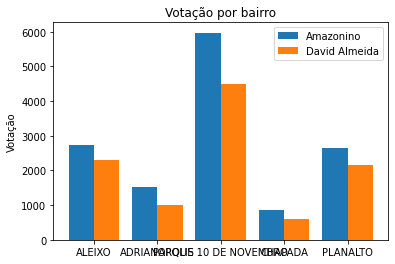

In [ ]:


import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = df_bairros_renda['bairro']
cand1 = df_bairros_renda['votos_1st']
cand2 = df_bairros_renda['votos_2st']


x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2 , cand1, width, label='Amazonino')
rects2 = ax.bar(x + width / 2 , cand2, width, label='David Almeida')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Votação')
ax.set_title('Votação por bairro')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



#### Qual a relação entre o candidato escolhido e a renda da população a nível de bairro?


In [ ]:
df_bairros_renda_menos = df_bairros.sort_values('renda_mensal', ascending=True)
df_bairros_renda_menos = df_bairros_renda_menos[['bairro', 'zona', 'renda_mensal', 'candidato_1st', 'votos_1st',	'candidato_2st', 	'votos_2st']]
df_bairros_renda_menos = df_bairros_renda_menos.head(5)

df_bairros_renda = df_bairros_renda.append(df_bairros_renda_menos)
df_bairros_renda

,bairro,zona,renda_mensal,candidato_1st,votos_1st,candidato_2st,votos_2st
1,ALEIXO,CENTRO-SUL,4930,AMAZONINO MENDES,2723,DAVID ALMEIDA,2294
0,ADRIANOPOLIS,CENTRO-SUL,4824,AMAZONINO MENDES,1513,DAVID ALMEIDA,993
30,NOSSA SENHORA DAS GRACAS,CENTRO-SUL,3707,AMAZONINO MENDES,2106,DAVID ALMEIDA,1325
35,PARQUE 10 DE NOVEMBRO,CENTRO-SUL,3112,AMAZONINO MENDES,5970,DAVID ALMEIDA,4484
7,CHAPADA,CENTRO-SUL,3096,AMAZONINO MENDES,858,DAVID ALMEIDA,597
40,PURAQUEQUARA,LESTE,680,AMAZONINO MENDES,846,DAVID ALMEIDA,834
53,TANCREDO NEVES,LESTE,700,AMAZONINO MENDES,6137,DAVID ALMEIDA,5815
10,COLONIA ANTONIO ALEIXO,LESTE,714,DAVID ALMEIDA,3041,AMAZONINO MENDES,1880
57,ZUMBI DOS PALMARES,LESTE,725,DAVID ALMEIDA,5004,AMAZONINO MENDES,4737
23,JORGE TEIXEIRA,LESTE,726,DAVID ALMEIDA,12751,AMAZONINO MENDES,12233


In [ ]:
df_bairros_renda_2t = df_bairros.sort_values('renda_mensal', ascending=False)
df_bairros_renda_2t = df_bairros_renda_2t[['bairro', 'zona', 'renda_mensal', 'candidato_1st_2t', 'votos_1st_2t',	'candidato_2st_2t', 	'votos_2st_2t']]

df_bairros_renda_menos_2t = df_bairros.sort_values('renda_mensal', ascending=True)
df_bairros_renda_menos_2t = df_bairros_renda_menos_2t[['bairro', 'zona', 'renda_mensal', 'candidato_1st_2t', 'votos_1st_2t',	'candidato_2st_2t', 	'votos_2st_2t']]
df_bairros_renda_menos_2t = df_bairros_renda_menos_2t.head(5)

df_bairros_renda_2t = df_bairros_renda_2t.append(df_bairros_renda_menos_2t)
df_bairros_renda_2t

,bairro,zona,renda_mensal,candidato_1st_2t,votos_1st_2t,candidato_2st_2t,votos_2st_2t
1,ALEIXO,CENTRO-SUL,4930,AMAZONINO MENDES,6012,DAVID ALMEIDA,5138
0,ADRIANOPOLIS,CENTRO-SUL,4824,AMAZONINO MENDES,3424,DAVID ALMEIDA,2266
30,NOSSA SENHORA DAS GRACAS,CENTRO-SUL,3707,AMAZONINO MENDES,4456,DAVID ALMEIDA,3063
35,PARQUE 10 DE NOVEMBRO,CENTRO-SUL,3112,AMAZONINO MENDES,12710,DAVID ALMEIDA,9914
7,CHAPADA,CENTRO-SUL,3096,AMAZONINO MENDES,1749,DAVID ALMEIDA,1332
...,...,...,...,...,...,...,...
40,PURAQUEQUARA,LESTE,680,AMAZONINO MENDES,1739,DAVID ALMEIDA,1626
53,TANCREDO NEVES,LESTE,700,DAVID ALMEIDA,13519,AMAZONINO MENDES,11132
10,COLONIA ANTONIO ALEIXO,LESTE,714,DAVID ALMEIDA,4638,AMAZONINO MENDES,3608
57,ZUMBI DOS PALMARES,LESTE,725,DAVID ALMEIDA,9724,AMAZONINO MENDES,9344


In [ ]:
df_bairros[['bairro', 'zona', 'renda_mensal', 'candidato_1st', 'votos_1st',	'candidato_2st', 	'votos_2st', 'candidato_1st_2t', 'votos_1st_2t',	'candidato_2st_2t', 	'votos_2st_2t']].sort_values('renda_mensal', ascending=False)

,bairro,zona,renda_mensal,candidato_1st,votos_1st,candidato_2st,votos_2st,candidato_1st_2t,votos_1st_2t,candidato_2st_2t,votos_2st_2t
1,ALEIXO,CENTRO-SUL,4930,AMAZONINO MENDES,2723,DAVID ALMEIDA,2294,AMAZONINO MENDES,6012,DAVID ALMEIDA,5138
0,ADRIANOPOLIS,CENTRO-SUL,4824,AMAZONINO MENDES,1513,DAVID ALMEIDA,993,AMAZONINO MENDES,3424,DAVID ALMEIDA,2266
30,NOSSA SENHORA DAS GRACAS,CENTRO-SUL,3707,AMAZONINO MENDES,2106,DAVID ALMEIDA,1325,AMAZONINO MENDES,4456,DAVID ALMEIDA,3063
35,PARQUE 10 DE NOVEMBRO,CENTRO-SUL,3112,AMAZONINO MENDES,5970,DAVID ALMEIDA,4484,AMAZONINO MENDES,12710,DAVID ALMEIDA,9914
7,CHAPADA,CENTRO-SUL,3096,AMAZONINO MENDES,858,DAVID ALMEIDA,597,AMAZONINO MENDES,1749,DAVID ALMEIDA,1332
37,PLANALTO,CENTRO-OESTE,2500,AMAZONINO MENDES,2660,DAVID ALMEIDA,2142,AMAZONINO MENDES,5354,DAVID ALMEIDA,4769
17,DOM PEDRO,CENTRO-OESTE,2456,AMAZONINO MENDES,3837,DAVID ALMEIDA,3002,AMAZONINO MENDES,7936,DAVID ALMEIDA,6495
55,VILA BURITI,SUL,2430,CORONEL MENEZES,127,DAVID ALMEIDA,59,DAVID ALMEIDA,228,AMAZONINO MENDES,105
19,FLORES,CENTRO-SUL,2357,AMAZONINO MENDES,4316,DAVID ALMEIDA,4190,DAVID ALMEIDA,9070,AMAZONINO MENDES,8948
6,CENTRO,SUL,1927,AMAZONINO MENDES,5563,DAVID ALMEIDA,3886,AMAZONINO MENDES,11076,DAVID ALMEIDA,8756


#### Qual a relação entre o partido escolhido (vereadores e prefeitos) e a média salarial da população a nível de bairro?


#### Qual a relação entre o partido do vereador e o partido do prefeito escolhido por zona municipal?

### Alberto

#### Qual atributo mais relevante na escolha de um candidato ? (renda, densidade populacional,grau de escolaridade, faixa etária)

#### Quais bairros com menor índice de abstencao ou branco ou nulos?

## Bibliografia
* https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais
* https://resultados.tse.jus.br/oficial
* https://dados.gov.br/dataset/prestacao-de-contas-das-campanhas-eleitorais
* https://divulgacandcontas.tse.jus.br/divulga/#/municipios/2020/2030402020/02550/candidatos
* https://divulgacandcontas.tse.jus.br/divulga/#
* http://idebescola.inep.gov.br/ideb/consulta-publica